### Importación de bibliotecas

In [283]:
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import os
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import datetime
from sklearn.cluster import KMeans
from geopy.distance import geodesic 
import warnings

In [285]:
# Load the dataset
file_path = 'rome_u_journeys.csv'  # Assuming the file is available in the working directory
# Load the CSV file into a DataFrame with specified column names
try:
    df = pd.read_csv(file_path, header=0)
    # Display the first few rows of the dataset to confirm loading
    df.head()
except FileNotFoundError:
    "The file 'rome_u_journeys.csv' was not found in the specified directory."

df

idS                  tsO                  tsD   price    tt  \
0      A0H4  03/02/2021 18:10:03  03/02/2021 18:17:44  2.1525   461   
1      A0H4  13/02/2021 18:21:13  13/02/2021 18:25:33  1.6500   260   
2      A0H4  14/02/2021 13:39:54  14/02/2021 13:48:03  2.2225   489   
3      A0H4  14/02/2021 14:35:03  14/02/2021 14:35:13  1.0250    10   
4      A0H4  14/02/2021 14:37:53  14/02/2021 14:57:53  4.0000  1200   
...     ...                  ...                  ...     ...   ...   
25181  Z9W9  25/02/2021 12:50:13  25/02/2021 12:57:14  2.0525   421   
25182  Z9W9  26/02/2021 13:34:13  26/02/2021 13:38:53  1.7000   280   
25183  Z9W9  26/02/2021 19:44:54  26/02/2021 19:52:33  2.1475   459   
25184  Z9W9  27/02/2021 17:01:24  27/02/2021 17:03:53  1.3725   149   
25185  Z9W9  28/02/2021 17:47:13  28/02/2021 18:00:23  2.9750   790   

               dis        vel       lonO       latO       lonD       latD  
0      1715.336751  13.395254  12.466222  41.867388  12.470660  41.853908  
1      1234.472044  17.092690  12.471143  41.923692  12.467502  41.934306  
2      2221.481536  16.354465  12.467524  41.934342  12.486330  41.928270  
3         3.712940   1.336658  12.486283  41.928267  12.486276  41.928300  
4      4562.843566  13.688531  12.486275  41.928301  12.457922  41.904302  
...            ...        ...        ...        ...        ...        ...  
25181  2385.131061  20.395420  12.501860  41.894429  12.481330  41.900720  
25182  1193.360009  15.343200  12.481623  41.900672  12.487869  41.893405  
25183   827.536316   6.490481  12.487891  41.893414  12.484797  41.894823  
25184   196.314727   4.743175  12.484793  41.894875  12.482676  41.895419  
25185  1746.609733   7.959234  12.482522  41.895278  12.482480  41.895280  

[25186 rows x 11 columns]

### EDA

In [288]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25186 entries, 0 to 25185
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idS     25186 non-null  object 
 1   tsO     25186 non-null  object 
 2   tsD     25186 non-null  object 
 3   price   25186 non-null  float64
 4   tt      25186 non-null  int64  
 5   dis     25186 non-null  float64
 6   vel     25186 non-null  float64
 7   lonO    25186 non-null  float64
 8   latO    25186 non-null  float64
 9   lonD    25186 non-null  float64
 10  latD    25186 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.1+ MB


(              price             tt           dis           vel          lonO  \
 count  25186.000000   25186.000000  25186.000000  25186.000000  25186.000000   
 mean       3.034208     813.683237   1939.920890     11.486824     12.486697   
 std       11.970239    4788.095489   1656.689330      4.820036      0.022184   
 min        1.015000       6.000000      0.082808      0.001199     12.437227   
 25%        1.622500     249.000000    760.981361      8.454849     12.468673   
 50%        2.172500     469.000000   1506.437794     12.062827     12.483106   
 75%        3.125000     850.000000   2708.464547     15.126343     12.506559   
 max     1284.997500  513599.000000  18267.975980     61.026780     12.533779   
 
                latO          lonD          latD  
 count  25186.000000  25186.000000  25186.000000  
 mean      41.888974     12.486821     41.888953  
 std        0.023146      0.022395      0.023327  
 min       41.814922     12.435497     41.791932  
 25%       41.

In [290]:
import pandas as pd
import numpy as np

# Filtrar filas que contengan al menos un valor vacío, None, NaN, 0, o 0.0
rows_with_issues = df[
    df.isnull().any(axis=1) | (df == 0).any(axis=1)
]

# Obtener los índices (números de fila) de las filas con problemas
row_numbers = rows_with_issues.index.tolist()

print("Filas con valores vacíos, None, NaN, 0 o 0.0:", row_numbers)



Filas con valores vacíos, None, NaN, 0 o 0.0: []


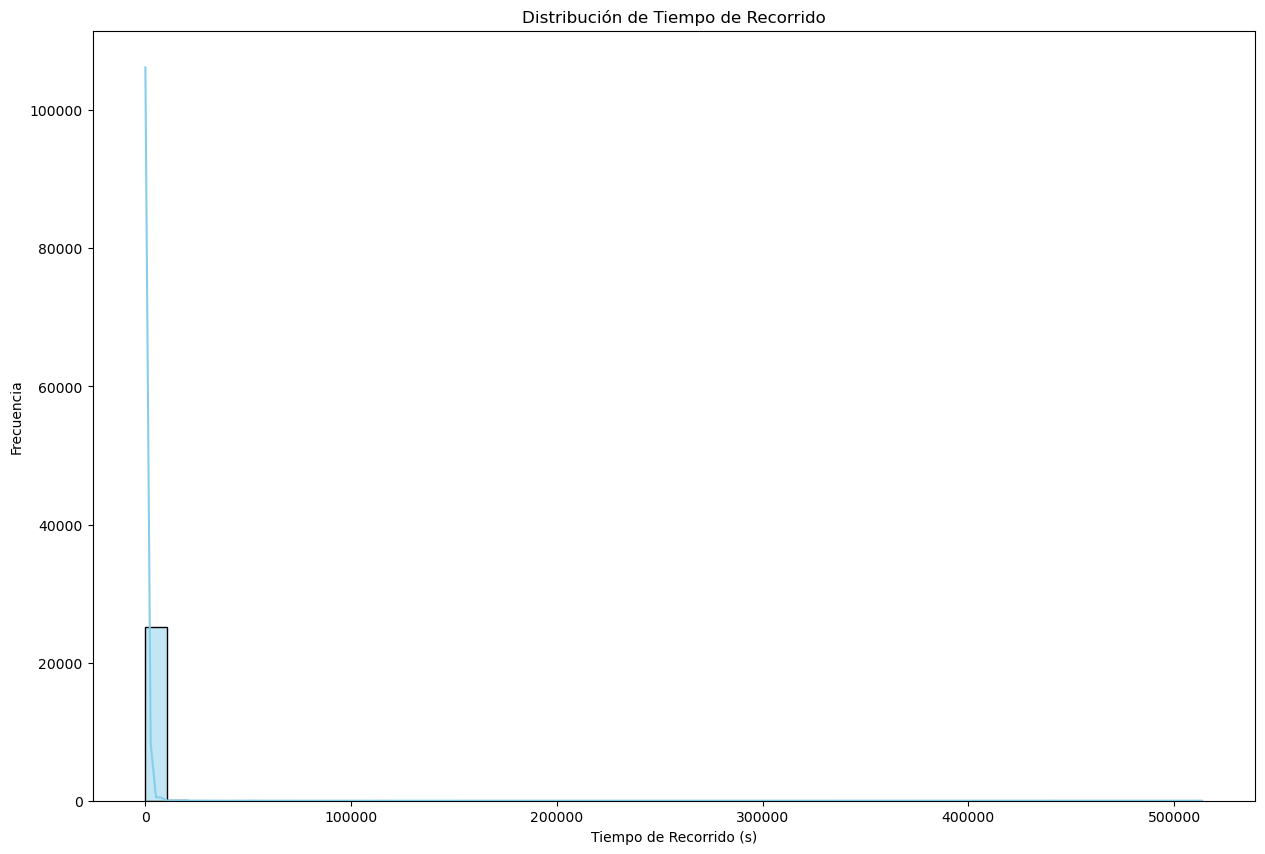

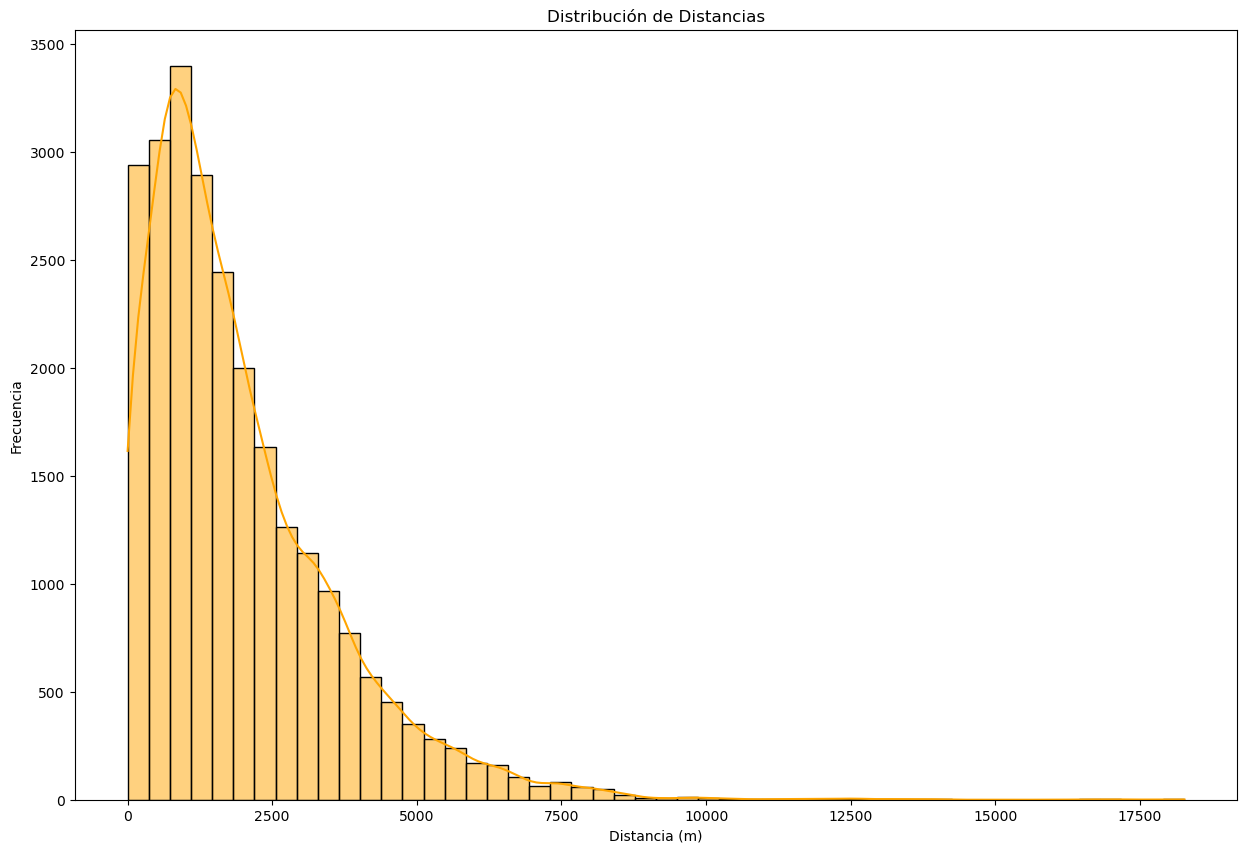

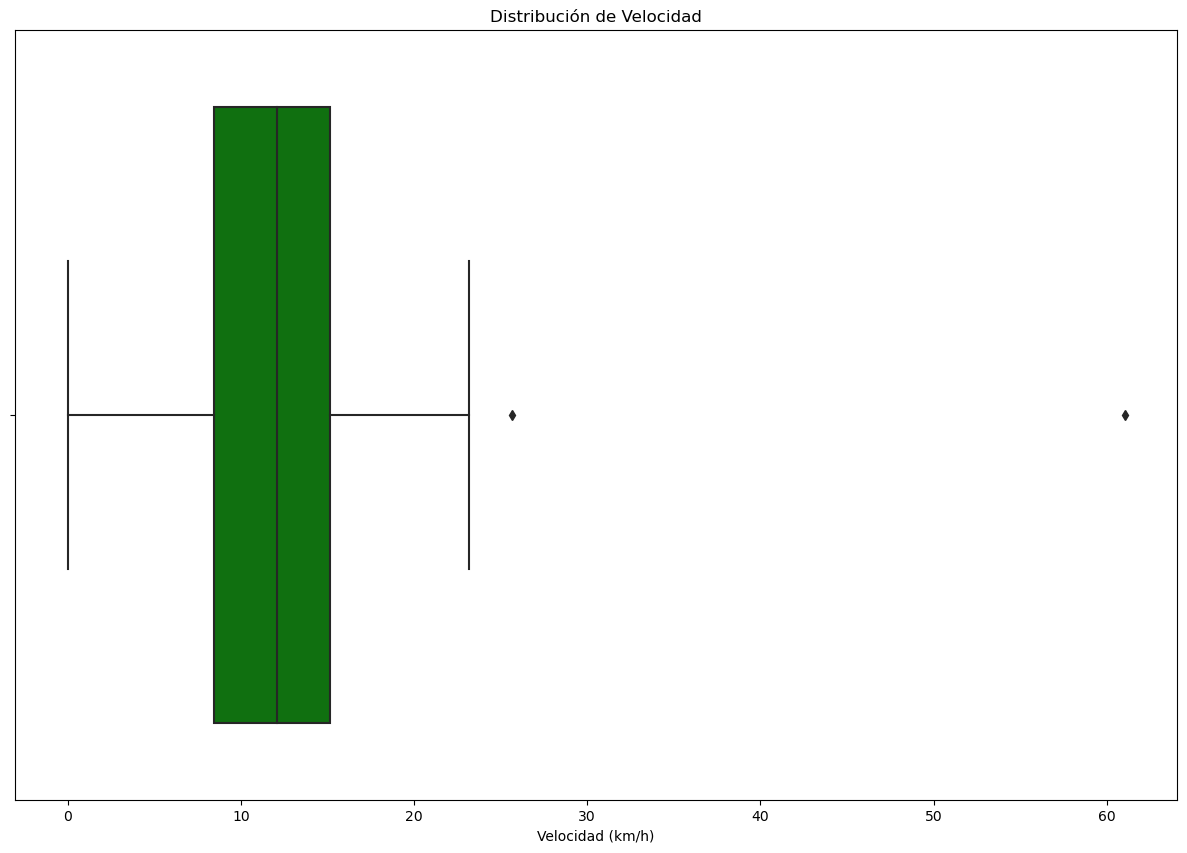

In [292]:
# Distribución de tiempo de recorrido
plt.figure(figsize=(15, 10))
sns.histplot(df['tt'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de Tiempo de Recorrido')
plt.xlabel('Tiempo de Recorrido (s)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de distancias
plt.figure(figsize=(15, 10))
sns.histplot(df['dis'], bins=50, kde=True, color='orange')
plt.title('Distribución de Distancias')
plt.xlabel('Distancia (m)')
plt.ylabel('Frecuencia')
plt.show()

# Velocidad media
plt.figure(figsize=(15, 10))
sns.boxplot(x=df['vel'], color='green')
plt.title('Distribución de Velocidad')
plt.xlabel('Velocidad (km/h)')
plt.show()

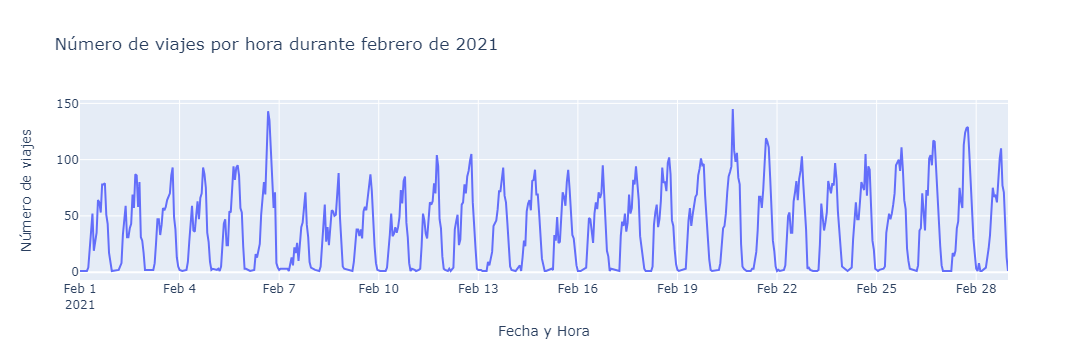

In [293]:
# Convertir la columna `tsO` a formato datetime si no lo has hecho
# Asegurarnos de que la columna `tsO` esté en formato datetime con el formato correcto
df['tsO'] = pd.to_datetime(df['tsO'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)

# **Gráfico 1: Número de viajes por hora**
# Extraer la hora de cada viaje
df['hour'] = df['tsO'].dt.hour

# Agrupar los datos por fecha y hora y contar el número de viajes
viajes_por_hora = df.groupby(df['tsO'].dt.floor('H')).size().reset_index(name='Numero_viajes')

# Renombrar la columna agrupada como 'Fecha_Hora' para claridad
viajes_por_hora.rename(columns={'tsO': 'Fecha_Hora'}, inplace=True)

# Crear el gráfico interactivo
fig1 = px.line(
    viajes_por_hora,
    x='Fecha_Hora',
    y='Numero_viajes',
    title='Número de viajes por hora durante febrero de 2021',
    labels={'Fecha_Hora': 'Fecha y Hora', 'Numero_viajes': 'Número de viajes'},
)

# Mejorar la visualización con detalles en los ejes y el hover
fig1.update_layout(
    xaxis_title='Fecha y Hora',
    yaxis_title='Número de viajes',
    template='plotly',
    hovermode='x'
)

# Mostrar el gráfico interactivo
fig1.show()

# **Gráfico 2: Promedio de viajes por hora del día**
# Calcular el número promedio de viajes por cada hora
average_trips_per_hour = df.groupby('hour').size().groupby(level=0).mean()

# Crear un gráfico de barras interactivo con Plotly
fig2 = px.bar(
    average_trips_per_hour,
    x=average_trips_per_hour.index,
    y=average_trips_per_hour.values,
    labels={'x': 'Hora del día', 'y': 'Número promedio de viajes'},
    title='Número promedio de viajes que comenzaron a cada hora del día en febrero de 2021'
)

# Configurar ejes y diseño para mejor visualización
fig2.update_layout(
    xaxis_title='Hora del día',
    yaxis_title='Número promedio de viajes',
    xaxis=dict(dtick=1),  # Mostrar todas las horas en el eje X
    template='plotly',     # Estilo para hacer el gráfico más agradable
    hovermode="x"          # Para un efecto de hover intuitivo
)

# Mostrar el gráfico interactivo
fig2.show()

# **Gráfico 3: Promedio de viajes por día de la semana**
# Extraer el día de la semana como nombre (lunes, martes, etc.)
df['weekday'] = df['tsO'].dt.day_name()

# Calcular el número promedio de viajes por cada día de la semana
average_trips_per_weekday = df.groupby('weekday').size() / 4  # Dividido entre 4 semanas

# Asegurar el orden correcto de los días
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_trips_per_weekday = average_trips_per_weekday.reindex(ordered_days)

# Crear un gráfico de barras interactivo con Plotly
fig3 = px.bar(
    average_trips_per_weekday,
    x=average_trips_per_weekday.index,
    y=average_trips_per_weekday.values,
    labels={'x': 'Día de la semana', 'y': 'Número promedio de viajes'},
    title='Número promedio de viajes que comenzaron cada día de la semana en febrero de 2021'
)

# Configurar ejes y diseño para mejor visualización
fig3.update_layout(
    xaxis_title='Día de la semana',
    yaxis_title='Número promedio de viajes',
    xaxis=dict(categoryorder='array', categoryarray=ordered_days),  # Mantener el orden correcto
    template='plotly',             # Estilo para hacer el gráfico más agradable
    hovermode="x"                  # Para un efecto de hover intuitivo
)

# Mostrar el gráfico interactivo
fig3.show()


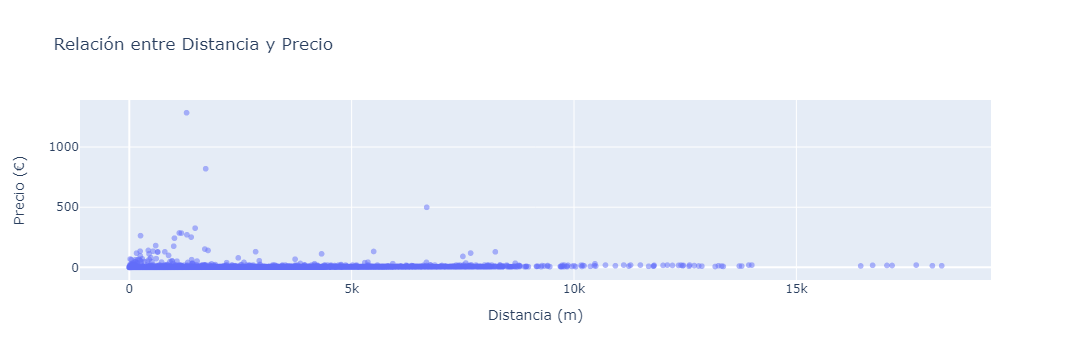

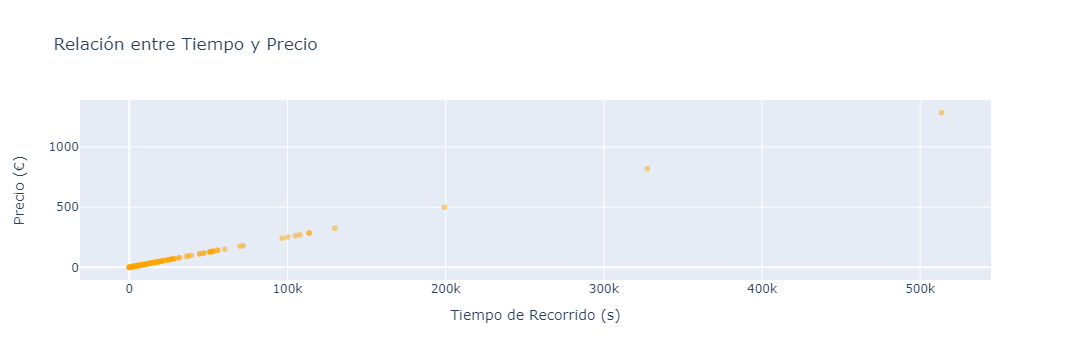

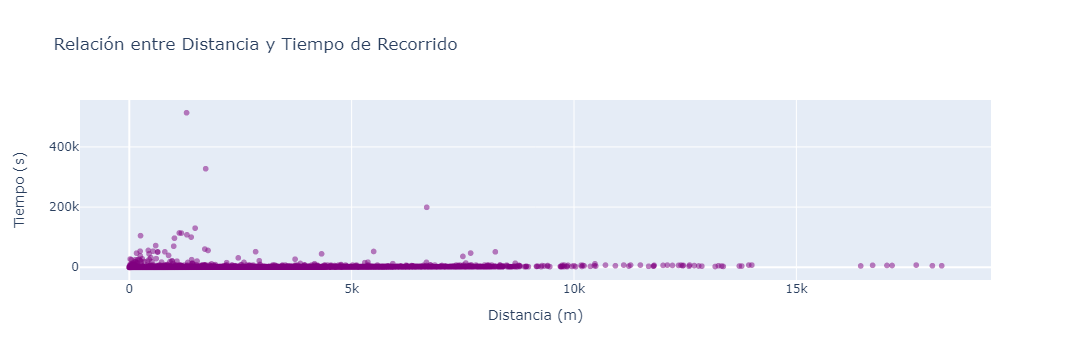

In [294]:
# Relación entre distancia y precio
fig1 = px.scatter(
    df, x='dis', y='price', 
    title='Relación entre Distancia y Precio',
    labels={'dis': 'Distancia (m)', 'price': 'Precio (€)'},
    opacity=0.5
)
fig1.update_traces(marker=dict(size=6))
fig1.update_layout(template='plotly')

# Relación entre tiempo y precio
fig2 = px.scatter(
    df, x='tt', y='price', 
    title='Relación entre Tiempo y Precio',
    labels={'tt': 'Tiempo de Recorrido (s)', 'price': 'Precio (€)'},
    color_discrete_sequence=['orange'],
    opacity=0.5
)
fig2.update_traces(marker=dict(size=6))
fig2.update_layout(template='plotly')

# Relación entre distancia y tiempo
fig3 = px.scatter(
    df, x='dis', y='tt', 
    title='Relación entre Distancia y Tiempo de Recorrido',
    labels={'dis': 'Distancia (m)', 'tt': 'Tiempo (s)'},
    color_discrete_sequence=['purple'],
    opacity=0.5
)
fig3.update_traces(marker=dict(size=6))
fig3.update_layout(template='plotly')

# Mostrar los gráficos
fig1.show()
fig2.show()
fig3.show()

### Eliminación de viajes atípicos en tiempo
Dado que en un día hay 86.400s, no tiene ningún sentido la existencia de viajes que duran más de un día. Esos casos se tratan claramente de un fallo. 

In [298]:
lower_percentile = df['tt'].quantile(0.04)
upper_percentile = df['tt'].quantile(0.99)
df = df[(df['tt'] >= lower_percentile) & (df['tt'] <= upper_percentile)]
print(f"Valores atípicos eliminados: {25186 - len(df)} filas")

Valores atípicos eliminados: 1202 filas


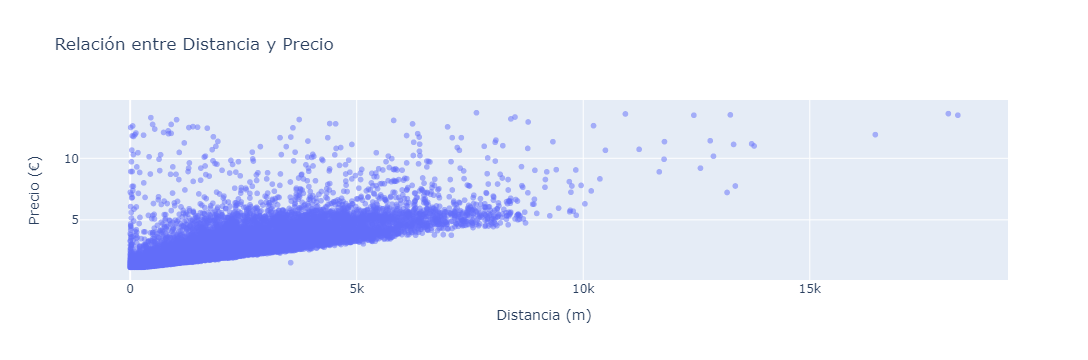

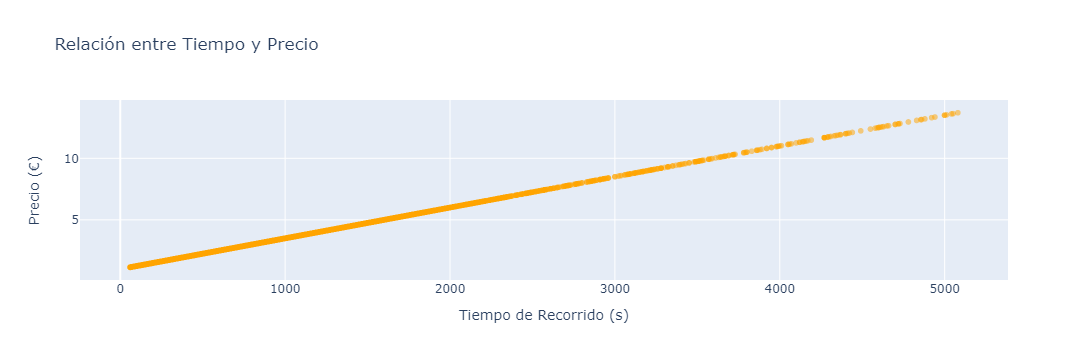

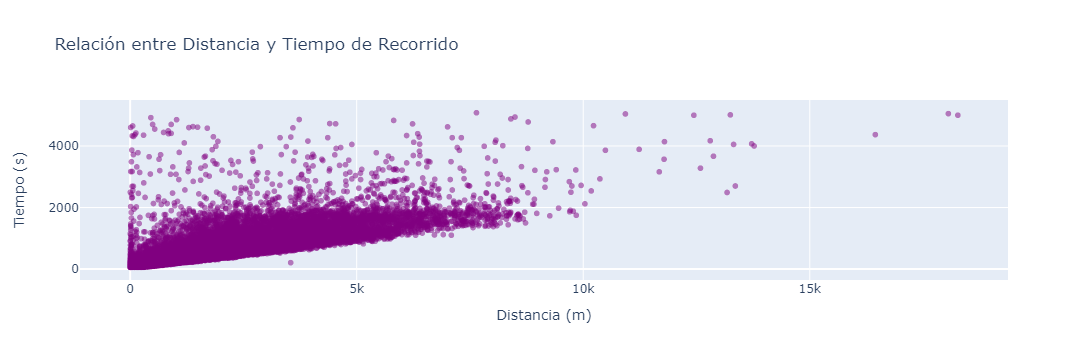

In [301]:
# Relación entre distancia y precio
fig1 = px.scatter(
    df, x='dis', y='price', 
    title='Relación entre Distancia y Precio',
    labels={'dis': 'Distancia (m)', 'price': 'Precio (€)'},
    opacity=0.5
)
fig1.update_traces(marker=dict(size=6))
fig1.update_layout(template='plotly')

# Relación entre tiempo y precio
fig2 = px.scatter(
    df, x='tt', y='price', 
    title='Relación entre Tiempo y Precio',
    labels={'tt': 'Tiempo de Recorrido (s)', 'price': 'Precio (€)'},
    color_discrete_sequence=['orange'],
    opacity=0.5
)
fig2.update_traces(marker=dict(size=6))
fig2.update_layout(template='plotly')

# Relación entre distancia y tiempo
fig3 = px.scatter(
    df, x='dis', y='tt', 
    title='Relación entre Distancia y Tiempo de Recorrido',
    labels={'dis': 'Distancia (m)', 'tt': 'Tiempo (s)'},
    color_discrete_sequence=['purple'],
    opacity=0.5
)
fig3.update_traces(marker=dict(size=6))
fig3.update_layout(template='plotly')

# Mostrar los gráficos
fig1.show()
fig2.show()
fig3.show()

In [302]:
df.describe()

tsO        price            tt           dis  \
count                          23984  23984.00000  23984.000000  23984.000000   
mean   2021-02-15 22:54:05.699716864      2.61957    647.828052   1996.739029   
min              2021-02-01 00:21:03      1.15000     60.000000      0.082844   
25%       2021-02-08 19:02:45.500000      1.67250    269.000000    832.674250   
50%              2021-02-16 16:16:33      2.20000    480.000000   1573.340899   
75%    2021-02-22 19:56:48.750000128      3.14750    859.000000   2763.298949   
max              2021-02-28 23:07:03     13.70000   5080.000000  18267.975980   
std                              NaN      1.39441    557.764127   1592.930775   

                vel          lonO          latO          lonD          latD  \
count  23984.000000  23984.000000  23984.000000  23984.000000  23984.000000   
mean      11.892588     12.486867     41.889124     12.487006     41.889099   
min        0.001199     12.437227     41.814922     12.435497     41.814786   
25%        8.981453     12.468846     41.876013     12.469157     41.875929   
50%       12.309773     12.483295     41.888378     12.483601     41.888319   
75%       15.250424     12.506806     41.905392     12.506968     41.905338   
max       61.026780     12.533779     41.950501     12.536127     41.950354   
std        4.468545      0.022212      0.023058      0.022434      0.023240   

               hour  
count  23984.000000  
mean      15.065669  
min        0.000000  
25%       12.000000  
50%       16.000000  
75%       18.000000  
max       23.000000  
std        4.005050

### Mapas de calor

In [306]:
# Convertir la columna `tsO` a formato datetime
df['tsO'] = pd.to_datetime(df['tsO'], format='%d/%m/%Y %H:%M:%S')

# Extraer la hora de `tsO` para agrupar los datos
df['hour'] = df['tsO'].dt.hour

# Crear un mapa base centrado en la ubicación media de los datos
mapa_base = folium.Map(location=[df['latO'].mean(), df['lonO'].mean()], zoom_start=12)

# Iterar sobre cada hora y agregar un HeatMap a la capa de horas
for hour in range(24):
    # Filtrar el DataFrame para la hora actual
    df_hour = df[df['hour'] == hour]
    
    # Crear una lista de puntos (latitud, longitud) para el HeatMap
    heat_data = list(zip(df_hour['latO'], df_hour['lonO']))
    
    # Agregar un mapa de calor para esta hora
    HeatMap(heat_data, radius=10, blur=15, max_zoom=1, name=f"Hora {hour}:00").add_to(mapa_base)

# Añadir una capa de control para activar/desactivar las capas de cada hora
folium.LayerControl().add_to(mapa_base)

# Guardar el mapa interactivo
mapa_base.save('mapa_calor_por_hora.html')

In [308]:
# Convertir la columna `tsO` a formato datetime
df['tsO'] = pd.to_datetime(df['tsO'], format='%d/%m/%Y %H:%M:%S')

# Extraer la hora de `tsO` para agrupar los datos
df['hour'] = df['tsO'].dt.hour

# Crear un diccionario para almacenar los datos de cada hora
hourly_data = []
for hour in range(24):
    # Filtrar los datos para cada hora
    df_hour = df[df['hour'] == hour]
    
    # Crear una lista de puntos (latitud, longitud, intensidad) para el HeatMap
    heat_data = [[row['latO'], row['lonO'], 1] for index, row in df_hour.iterrows()]
    
    # Añadir los datos de la hora actual al diccionario
    hourly_data.append(heat_data)

# Crear el mapa base centrado en la ubicación media de los datos
mapa_base = folium.Map(location=[df['latO'].mean(), df['lonO'].mean()], zoom_start=12)

# Crear el mapa de calor con el control de tiempo usando colores cálidos
HeatMapWithTime(
    hourly_data,
    radius=10,
    gradient={0.2: 'yellow', 0.5: 'orange', 0.7: 'red', 1: 'darkred'},  # Colores cálidos
    auto_play=False,
    max_opacity=0.8
).add_to(mapa_base)

# Guardar el mapa interactivo
mapa_base.save('mapa_calor_por_hora_interactivo.html')



### Clustering y elección de estaciones de carga

In [311]:
# Ocultar los warnings
warnings.filterwarnings("ignore")

# Suponiendo que el DataFrame 'df' ya está definido con las columnas 'latO', 'lonO', 'latD', 'lonD'
# Combinar las coordenadas de origen y destino en un solo conjunto de datos
coords = pd.DataFrame({
    'lat': pd.concat([df['latO'], df['latD']], ignore_index=True),
    'lon': pd.concat([df['lonO'], df['lonD']], ignore_index=True),
    'tipo': ['origen'] * len(df) + ['destino'] * len(df)
})

# Función para calcular la distancia de Haversine en kilómetros
def haversine_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Función recursiva para subdividir un clúster si su distancia media supera 500 metros
def subdivide_cluster(cluster_points, cluster_counter, max_distance=0.5):
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    cluster_points['sub_cluster'] = kmeans.fit_predict(cluster_points[['lat', 'lon']])
    sub_centroids = kmeans.cluster_centers_

    results = []
    final_centroids = []

    for sub_cluster in range(2):
        sub_cluster_points = cluster_points[cluster_points['sub_cluster'] == sub_cluster].copy()
        sub_centroide = sub_centroids[sub_cluster]

        sub_distances = sub_cluster_points.apply(
            lambda row: haversine_distance((row['lat'], row['lon']), (sub_centroide[0], sub_centroide[1])), axis=1
        )

        sub_avg_distance = sub_distances.mean()
        if sub_avg_distance > max_distance:
            subdivided_results = subdivide_cluster(sub_cluster_points, cluster_counter, max_distance)
            for result in subdivided_results:
                final_centroids.append(result['centroid'])
                results.append(result)
        else:
            cluster_counter += 1
            final_centroids.append(sub_centroide)
            results.append({
                'centroid': sub_centroide,
                'metrics': {
                    'Num_Puntos': len(sub_cluster_points),
                    'Distancia_Media_km': sub_avg_distance
                }
            })
    return results

# Proceso principal
n_inicial = 1
min_clusters = np.inf
best_metrics = None
optimal_centroids = []

while n_inicial < min_clusters:
    print(f"Probando con {n_inicial} clústeres iniciales...")
    coords['cluster'] = KMeans(n_clusters=n_inicial, n_init=10, random_state=0).fit_predict(coords[['lat', 'lon']])

    cluster_counter = 0
    iteration_metrics = []
    iteration_centroids = []

    for cluster in range(n_inicial):
        cluster_points = coords[coords['cluster'] == cluster].copy()
        centroide = KMeans(n_clusters=1, n_init=1, random_state=0).fit(cluster_points[['lat', 'lon']]).cluster_centers_[0]

        distances = cluster_points.apply(
            lambda row: haversine_distance((row['lat'], row['lon']), (centroide[0], centroide[1])), axis=1
        )

        avg_distance = distances.mean()

        if avg_distance > 0.5:
            print(f"Subdividiendo cluster {cluster} con distancia media {avg_distance:.2f} km.")
            subdivided_results = subdivide_cluster(cluster_points, cluster_counter)
            for result in subdivided_results:
                iteration_centroids.append(result['centroid'])
                iteration_metrics.append(result['metrics'])
        else:
            cluster_counter += 1
            iteration_centroids.append(centroide)
            iteration_metrics.append({
                'Num_Puntos': len(cluster_points),
                'Distancia_Media_km': avg_distance
            })

    iteration_clusters = len(iteration_metrics)
    print(f"Número de clústeres tras iteración con {n_inicial} clústeres iniciales: {iteration_clusters}")

    if iteration_clusters <= min_clusters:  # Actualiza siempre que se encuentre un número igual o menor de clusters
        min_clusters = iteration_clusters
        best_metrics = pd.DataFrame(iteration_metrics)
        optimal_centroids = iteration_centroids.copy()  # Guarda los centroides de los clústeres óptimos

    n_inicial += 1

Probando con 1 clústeres iniciales...
Subdividiendo cluster 0 con distancia media 2.82 km.
Número de clústeres tras iteración con 1 clústeres iniciales: 47
Probando con 2 clústeres iniciales...
Subdividiendo cluster 0 con distancia media 1.92 km.
Subdividiendo cluster 1 con distancia media 2.56 km.
Número de clústeres tras iteración con 2 clústeres iniciales: 47
Probando con 3 clústeres iniciales...
Subdividiendo cluster 0 con distancia media 1.99 km.
Subdividiendo cluster 1 con distancia media 1.61 km.
Subdividiendo cluster 2 con distancia media 1.81 km.
Número de clústeres tras iteración con 3 clústeres iniciales: 48
Probando con 4 clústeres iniciales...
Subdividiendo cluster 0 con distancia media 1.57 km.
Subdividiendo cluster 1 con distancia media 0.89 km.
Subdividiendo cluster 2 con distancia media 1.99 km.
Subdividiendo cluster 3 con distancia media 1.50 km.
Número de clústeres tras iteración con 4 clústeres iniciales: 43
Probando con 5 clústeres iniciales...
Subdividiendo cluste

In [312]:
# Asignar identificadores únicos a cada cluster y realizar la agrupación
optimal_k = len(optimal_centroids)  # Número óptimo de clusters encontrado anteriormente
kmeans_final = KMeans(n_clusters=optimal_k, init=np.array(optimal_centroids), n_init=1, random_state=0)

# Agrupación de los puntos originales (coordenadas origen y destino)
coords['cluster'] = kmeans_final.fit_predict(coords[['lat', 'lon']])
centroids = kmeans_final.cluster_centers_

# Calcular métricas para cada cluster
cluster_metrics = []
for cluster_id in range(optimal_k):
    cluster_points = coords[coords['cluster'] == cluster_id]
    centroid = centroids[cluster_id]

    # Distancia media de los puntos al centroide
    distances = cluster_points.apply(
        lambda row: haversine_distance((row['lat'], row['lon']), (centroid[0], centroid[1])), axis=1
    )
    avg_distance = distances.mean()

    # Número de puntos y porcentaje de origen/destino
    num_points = len(cluster_points)
    pct_origen = len(cluster_points[cluster_points['tipo'] == 'origen']) / num_points * 100
    pct_destino = len(cluster_points[cluster_points['tipo'] == 'destino']) / num_points * 100

    # Almacenar métricas
    cluster_metrics.append({
        'Cluster_ID': cluster_id,
        'Centroide_Lat': centroid[0],
        'Centroide_Lon': centroid[1],
        'Distancia_Media_km': avg_distance,
        'Num_Puntos': num_points,
        'Pct_Origen': pct_origen,
        'Pct_Destino': pct_destino
    })

# Crear un DataFrame con las métricas y usar Cluster_ID como índice
metrics_df = pd.DataFrame(cluster_metrics).set_index('Cluster_ID')
metrics_df.to_csv('cluster_metrics.csv')

# Crear copia del DataFrame original y añadir columnas para los clusters de origen y destino
df_with_clusters = df.copy()

# Predecir los clusters de origen y destino utilizando los nombres de columnas correctos
df_with_clusters['clusterO'] = kmeans_final.predict(df_with_clusters[['latO', 'lonO']].rename(columns={'latO': 'lat', 'lonO': 'lon'}))
df_with_clusters['clusterD'] = kmeans_final.predict(df_with_clusters[['latD', 'lonD']].rename(columns={'latD': 'lat', 'lonD': 'lon'}))

# Mostrar las métricas por pantalla
print(metrics_df)

# Guardar el DataFrame actualizado
output_file = 'df_with_clusters.csv'
df_with_clusters.to_csv(output_file, index=False)
print(f"Archivo guardado: {output_file}")

            Centroide_Lat  Centroide_Lon  Distancia_Media_km  Num_Puntos  \
Cluster_ID                                                                 
0               41.879856      12.510375            0.447526        3037   
1               41.909890      12.472796            0.415460        1764   
2               41.855957      12.479274            0.393418        1123   
3               41.914119      12.521666            0.438023         894   
4               41.904979      12.511413            0.483289         432   
5               41.888195      12.471115            0.349055        1869   
6               41.892500      12.492634            0.384945        2040   
7               41.881260      12.459078            0.344616        2040   
8               41.885580      12.520644            0.377824        1593   
9               41.918420      12.459865            0.386741         973   
10              41.925987      12.466829            0.447158         591   
11          

In [313]:
# Visualización en un mapa
colors = list(mcolors.CSS4_COLORS.values())[:optimal_k]

# Crear mapa
mapa = folium.Map(location=[coords['lat'].mean(), coords['lon'].mean()], zoom_start=10)

# Añadir puntos de cada cluster
for cluster_id in range(optimal_k):
    cluster_points = coords[coords['cluster'] == cluster_id]
    cluster_color = colors[cluster_id % len(colors)]
    folium.Marker(
        location=[centroids[cluster_id][0], centroids[cluster_id][1]],
        icon=folium.Icon(color='blue', icon='info-sign'),
        popup=f'Cluster {cluster_id}'
    ).add_to(mapa)

    for _, row in cluster_points.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=3,
            color=cluster_color,
            fill=True,
            fill_color=cluster_color,
            fill_opacity=0.6
        ).add_to(mapa)

# Guardar y mostrar mapa
mapa.save("clusters_map.html")
print("Mapa guardado como clusters_map.html")

Mapa guardado como clusters_map.html


### Matriz origen-destino

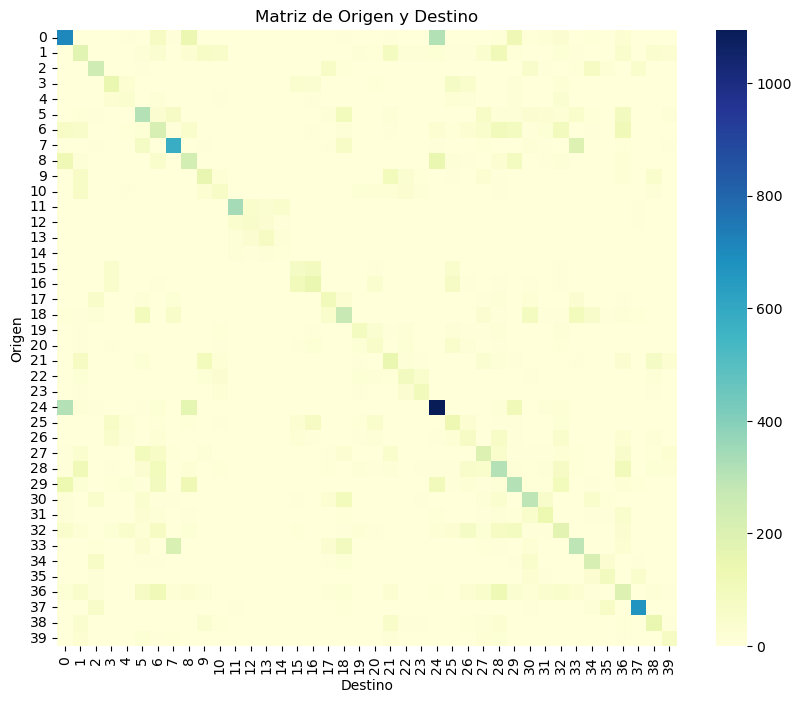

In [322]:
# Crear la matriz de origen y destino
clusters = pd.concat([df_with_clusters['clusterO'], df_with_clusters['clusterD']]).unique()
clusters.sort()

# Inicializar la matriz
matrix = pd.DataFrame(0, index=clusters, columns=clusters)

# Rellenar la matriz
for _, row in df_with_clusters.iterrows():
    origin = row['clusterO']
    destination = row['clusterD']
    matrix.loc[origin, destination] += 1

# Guardar la matriz como un archivo CSV
matrix.to_csv('origin_destination_matrix.csv')

# Mostrar la matriz como un gráfico de calor con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=False, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Matriz de Origen y Destino')
plt.xlabel('Destino')
plt.ylabel('Origen')
plt.show()


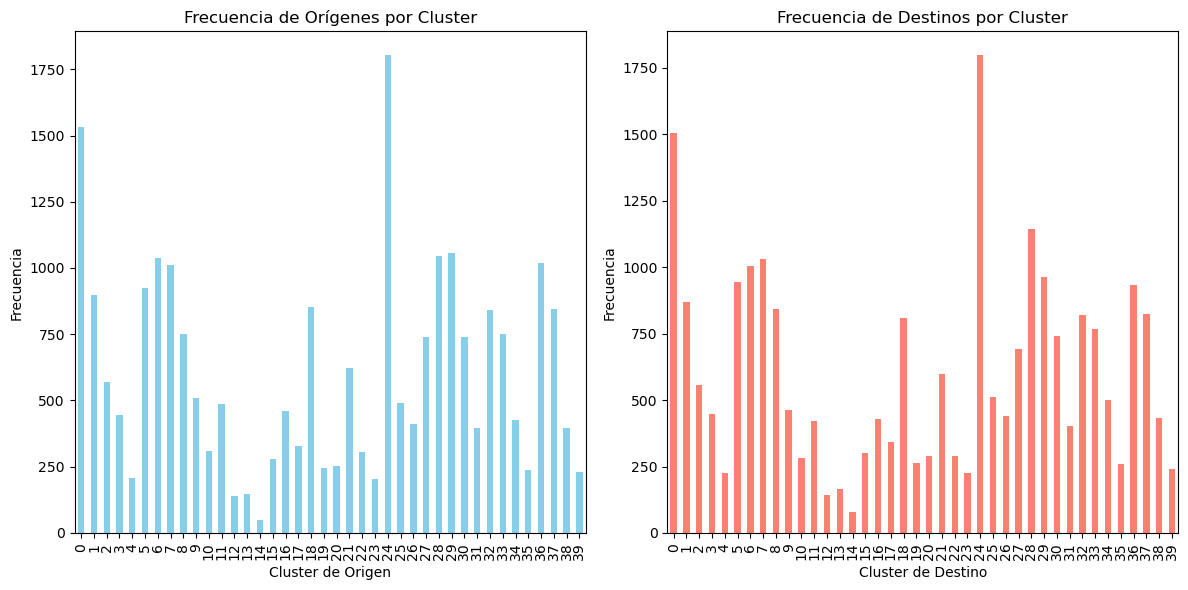

In [326]:
# Crear histogramas de los orígenes y destinos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_with_clusters['clusterO'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Orígenes por Cluster')
plt.xlabel('Cluster de Origen')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df_with_clusters['clusterD'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Frecuencia de Destinos por Cluster')
plt.xlabel('Cluster de Destino')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Precios de energía

In [38]:
# Cargar el archivo XLSX en un DataFrame llamado energia_df
energia_df = pd.read_excel('20210201_20210228_PUN.xlsx') 
energia_df, energia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    672 non-null    object
 1   Ora     672 non-null    int64 
 2   €/MWh   672 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.9+ KB


(           Data  Ora      €/MWh
 0    01/02/2021    1  41,177380
 1    01/02/2021    2  40,000000
 2    01/02/2021    3  40,000000
 3    01/02/2021    4  38,514970
 4    01/02/2021    5  34,867470
 ..          ...  ...        ...
 667  28/02/2021   20  61,725170
 668  28/02/2021   21  57,836670
 669  28/02/2021   22  52,263610
 670  28/02/2021   23  49,062890
 671  28/02/2021   24  43,610000
 
 [672 rows x 3 columns],
 None)

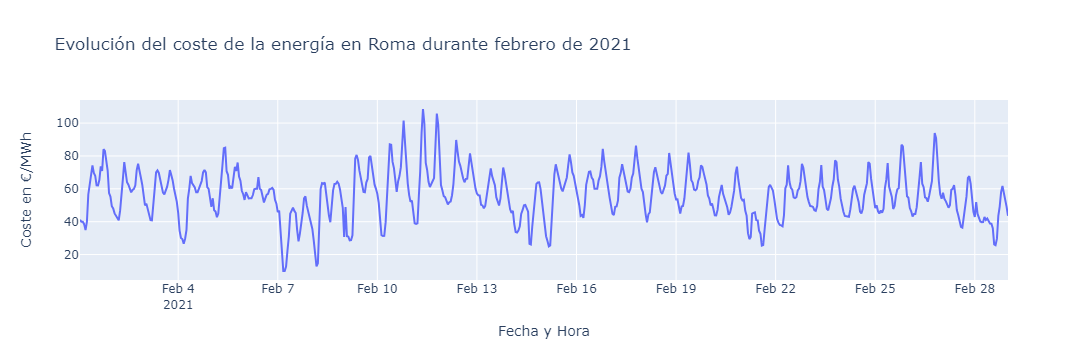

In [40]:
# Asegurarse de que todos los valores en la columna `€/MWh` sean cadenas antes de aplicar operaciones de cadena
energia_df['€/MWh'] = energia_df['€/MWh'].astype(str).str.replace(',', '.')

# Convertir la columna `€/MWh` a numérica
energia_df['€/MWh'] = pd.to_numeric(energia_df['€/MWh'], errors='coerce')

# Convertir la columna `Data` a formato datetime con el formato adecuado
energia_df['Data'] = pd.to_datetime(energia_df['Data'], format='%d/%m/%Y')

# Crear una columna de fecha y hora combinando `Data` y `Ora`
energia_df['Fecha_Hora'] = energia_df['Data'] + pd.to_timedelta(energia_df['Ora'], unit='h')

# Crear el gráfico interactivo
fig = px.line(
    energia_df,
    x='Fecha_Hora',
    y='€/MWh',
    title='Evolución del coste de la energía en Roma durante febrero de 2021',
    labels={'Fecha_Hora': 'Fecha y Hora', '€/MWh': 'Coste en €/MWh'}
)

# Mejorar la visualización con detalles en los ejes y el hover
fig.update_layout(
    xaxis_title='Fecha y Hora',
    yaxis_title='Coste en €/MWh',
    template='plotly',
    hovermode='x'
)

# Mostrar el gráfico interactivo
fig.show()


Hora con el precio más alto: 19 h, Precio: €76.04
Hora con el precio más bajo: 5 h, Precio: €39.07


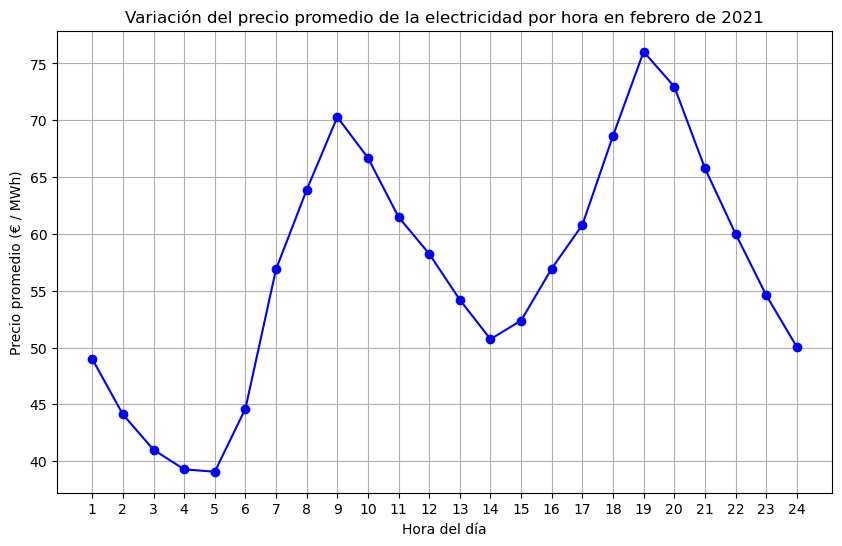

In [42]:
# Paso 1: Asegurarse de que la columna '€/MWh' sea numérica
energia_df['€/MWh'] = pd.to_numeric(energia_df['€/MWh'], errors='coerce')

# Paso 2: Agrupar los datos por hora y calcular el precio promedio por hora
precio_promedio_por_hora = energia_df.groupby('Ora')['€/MWh'].mean()

# Paso 3: Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(precio_promedio_por_hora.index, precio_promedio_por_hora.values, marker='o', color='b')
plt.title('Variación del precio promedio de la electricidad por hora en febrero de 2021')
plt.xlabel('Hora del día')
plt.ylabel('Precio promedio (€ / MWh)')
plt.xticks(range(1, 25))  # Aseguramos que las horas vayan de 1 a 24
plt.grid(True)

# Paso 4: Identificar las horas con los precios más altos y más bajos
hora_max_precio = precio_promedio_por_hora.idxmax()
hora_min_precio = precio_promedio_por_hora.idxmin()
max_precio = precio_promedio_por_hora.max()
min_precio = precio_promedio_por_hora.min()

# Mostrar las horas de los precios más altos y más bajos
print(f"Hora con el precio más alto: {hora_max_precio} h, Precio: €{max_precio:.2f}")
print(f"Hora con el precio más bajo: {hora_min_precio} h, Precio: €{min_precio:.2f}")

# Paso 5: Mostrar el gráfico
plt.show()